<a href="https://colab.research.google.com/github/mePriyansh/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mePriyansh/Stock-Market-Prediction/main/Stocks.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
df.shape


(1009, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.set_index('Date',drop=True,inplace=True)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

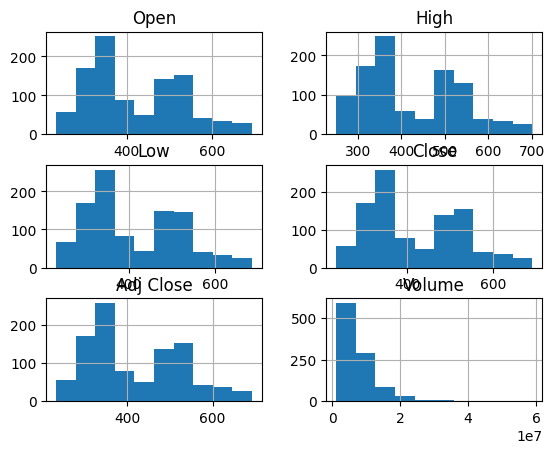

In [ ]:
df.hist()

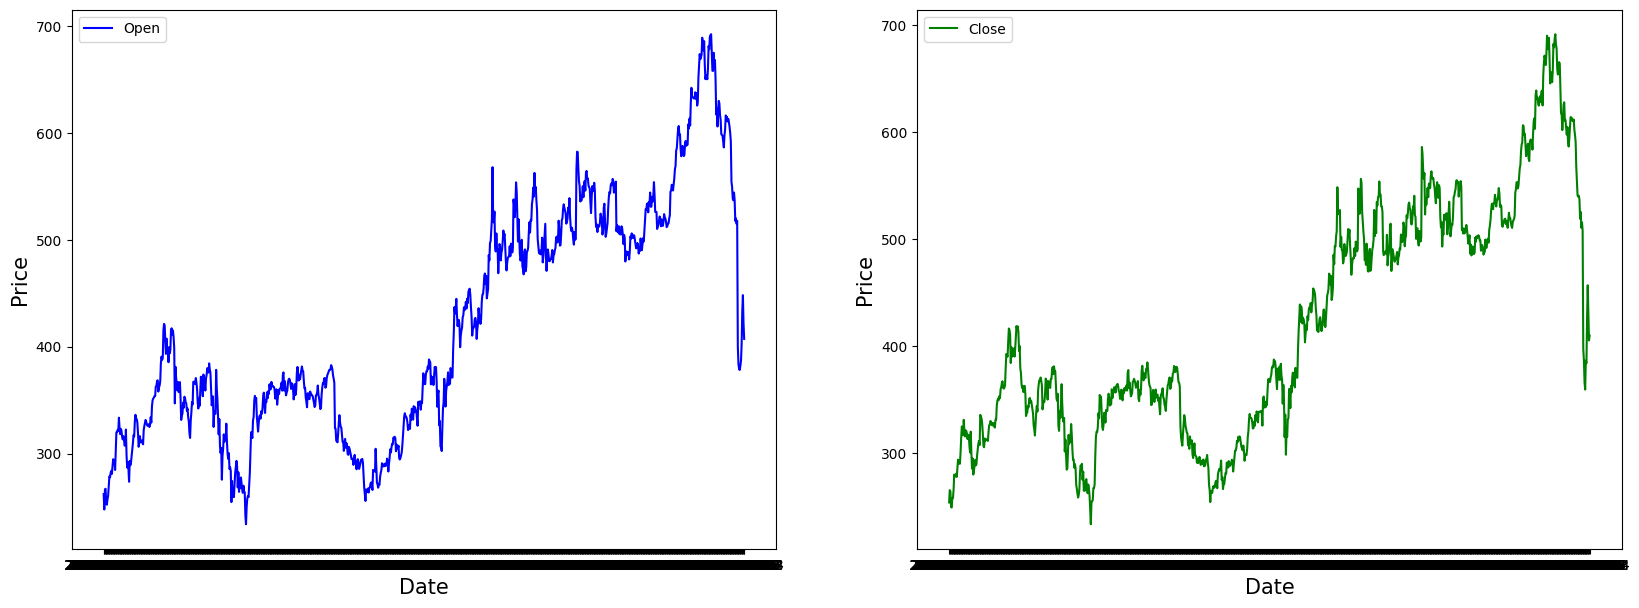

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [ ]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,0.061253,0.038304,0.041331,0.044516,0.044516,0.186150
2018-02-06,0.030059,0.035640,0.030273,0.069548,0.069548,0.198264
2018-02-07,0.071243,0.048408,0.072770,0.067015,0.067015,0.135690
2018-02-08,0.072334,0.037683,0.041265,0.035430,0.035430,0.141320
2018-02-09,0.043474,0.011436,0.010729,0.034053,0.034053,0.272902
2018-02-12,0.039744,0.018875,0.039067,0.052576,0.052576,0.127958
2018-02-13,0.050978,0.023893,0.051598,0.053275,0.053275,0.098878
2018-02-14,0.057915,0.042701,0.063976,0.070160,0.070160,0.170151
2018-02-15,0.078769,0.066283,0.080025,0.101330,0.101330,0.166476


In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,0.327182,0.303349,0.264323,0.334790,0.334790,0.540198
2022-01-25,0.316777,0.304348,0.294376,0.289509,0.289509,0.242412
2022-01-26,0.314879,0.293134,0.275667,0.274830,0.274830,0.199791
2022-01-27,0.323146,0.320091,0.322891,0.333807,0.333807,0.401326
2022-01-28,0.333399,0.302771,0.309656,0.328695,0.328695,0.187371
2022-01-31,0.366577,0.393147,0.367080,0.422140,0.422140,0.327275
2022-02-01,0.434178,0.461496,0.427186,0.487648,0.487648,0.370467
2022-02-02,0.467531,0.447062,0.429253,0.427251,0.427251,0.228565
2022-02-03,0.409048,0.396611,0.380447,0.375090,0.375090,0.151682


In [ ]:
training_size = round(len(df) * 0.75)

In [ ]:
training_size

757

In [ ]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((757, 6), (252, 6))

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((707, 50, 6), (707, 6), (202, 50, 6), (202, 6))

In [ ]:
# Creating LSTM Model(Long Short term Memory)

In [ ]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=25))

model.add(Dense(6, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            3200      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 6)                 156       
                                                                 
Total params: 8456 (33.03 KB)
Trainable params: 8456 (33.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
23/23 [==============================] - 6s 100ms/step - loss: 0.0371 - mean_absolute_error: 0.1393 - val_loss: 0.0260 - val_mean_absolute_error: 0.1284
Epoch 2/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0051 - mean_absolute_error: 0.0514 - val_loss: 0.0150 - val_mean_absolute_error: 0.0913
Epoch 3/100
23/23 [==============================] - 1s 41ms/step - loss: 0.0036 - mean_absolute_error: 0.0431 - val_loss: 0.0118 - val_mean_absolute_error: 0.0805
Epoch 4/100
23/23 [==============================] - 1s 44ms/step - loss: 0.0031 - mean_absolute_error: 0.0399 - val_loss: 0.0106 - val_mean_absolute_error: 0.0735
Epoch 5/100
23/23 [==============================] - 1s 40ms/step - loss: 0.0030 - mean_absolute_error: 0.0389 - val_loss: 0.0101 - val_mean_absolute_error: 0.0718
Epoch 6/100
23/23 [==============================] - 1s 45ms/step - loss: 0.0030 - mean_absolute_error: 0.0385 - val_loss: 0.0104 - val_mean_absolute_error: 0.0719
Epoch 7/100
23/

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:4]

7/7 [==============================] - 1s 12ms/step


array([[0.70096385, 0.6944727 , 0.67835283, 0.68803877, 0.68891346,
        0.15232973],
       [0.62321573, 0.6201632 , 0.59485734, 0.6079787 , 0.6088363 ,
        0.2831758 ],
       [0.5942938 , 0.59171385, 0.5842582 , 0.5877203 , 0.5898578 ,
        0.16973878],
       [0.59892577, 0.5963459 , 0.59127927, 0.5968178 , 0.6008906 ,
        0.12380129]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[5.5526288e+02, 5.6339880e+02, 5.3978558e+02, 5.4887103e+02,
        5.4927148e+02, 9.9426110e+06],
       [5.1962073e+02, 5.2993427e+02, 5.0180682e+02, 5.1221875e+02,
        5.1261139e+02, 1.7500320e+07],
       [5.0636206e+02, 5.1712238e+02, 4.9698572e+02, 5.0294424e+02,
        5.0392282e+02, 1.0948163e+07],
       [5.0848550e+02, 5.1920844e+02, 5.0017932e+02, 5.0710913e+02,
        5.0897369e+02, 8.2948000e+06],
       [5.1321320e+02, 5.2343445e+02, 5.0446759e+02, 5.1190555e+02,
        5.1432642e+02, 6.5827295e+06]], dtype=float32)

In [ ]:
train_data = np.random.rand(100, 6)  # Training data with 6 features
test_data = np.random.rand(10, 6)    # Test data with 6 features
test_predicted = np.random.rand(10, 6)  # Replace with your predicted data

# Fit the scaler on training data
MMS = MinMaxScaler().fit(train_data)

# Check if shapes match
print(train_data.shape)
print(test_data.shape)
print(test_predicted.shape)

# Attempt to inverse transform
test_inverse_predicted = MMS.inverse_transform(test_predicted)
print(test_inverse_predicted[:5])

(100, 6)
(10, 6)
(10, 6)
[[0.81360967 0.5042553  0.49497596 0.74848442 0.79435099 0.35003874]
 [0.22439098 0.02842394 0.79021089 0.44299702 0.42162273 0.22881941]
 [0.6699473  0.87879076 0.3415441  0.08211121 0.90186394 0.66233741]
 [0.05364162 0.56605918 0.47370002 0.32583046 0.91787367 0.27965419]
 [0.47589766 0.76692242 0.26882391 0.56152896 0.21299319 0.09098152]]
